In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
%matplotlib inline

In [4]:
path = r'C:\Users\slave\OneDrive\Documents\Spotify'
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'data_analyzed.csv'))

In [5]:
df.head()

Unnamed: 0  Position                  Track Name         Artist  Streams  \
0           0         1  Reggaetón Lento (Bailemos)           CNCO    19272   
1           1         2                    Chantaje        Shakira    19270   
2           2         3   Otra Vez (feat. J Balvin)  Zion & Lennox    15761   
3           3         4                Vente Pa' Ca   Ricky Martin    14954   
4           4         5                      Safari       J Balvin    14269   

         Date Region  Missing Artist  Missing Track Name  Country  Week  
0  2017-01-01     ec           False               False  Ecuador     1  
1  2017-01-01     ec           False               False  Ecuador     1  
2  2017-01-01     ec           False               False  Ecuador     1  
3  2017-01-01     ec           False               False  Ecuador     1  
4  2017-01-01     ec           False               False  Ecuador     1

### Cleaning

In [6]:
# missing values

df.isnull().sum()

# from previous exercises it was proven that all missing track names was accompanied by missing artist names
# values kept in data since they still have relevant information on location/number of streams

Unnamed: 0              0
Position                0
Track Name            657
Artist                657
Streams                 0
Date                    0
Region                  0
Missing Artist          0
Missing Track Name      0
Country                 0
Week                    0
dtype: int64

In [7]:
# duplicates

dups = df.duplicated()

In [9]:
dups.shape

# no dups

(3441197,)

### Exploring Data

In [14]:
# grouping countries by total streams

X_var = df.groupby(['Country']).sum(['Streams'])

In [15]:
X_var

Unnamed: 0  Position      Streams  Missing Artist  \
Country                                                                   
Argentina            13764062900   7457100   2776971684              14   
Australia           243623790900   7457100   3372128479              10   
Austria             149947774900   7457100    344322232              10   
Belgium             124984075300   7457100    556799739              10   
Bolivia              75279498239   2249261     97248182              14   
Brazil               90302401700   7457100   6890194505              10   
Canada              113972795300   7457100   3201208648              10   
Chile                79409915900   7457100   2191334779              15   
Columbia            207173560300   7457100    834076562              16   
Costa Rica           68398635900   7457100    362874962              16   
Czech Republic      186195960314   7250219    208602150              11   
Denmark             135980515300   7457100   1509648808              11   
Dominican Republic  182728191934   5059785    154057176              16   
Ecuador               2752782900   7457100    318441639              16   
El Salvador          33652868324   2110371     80421329              15   
Estonia               8860821230    327879     21653223               8   
Finland              19269702900   7457100   1246077272               8   
France                8258422900   7457100   3146285237              10   
Germany              73904275900   7457100   6072757512              10   
Global              232731436500   7416900  76852243776              16   
Greece               91185666396   1037056     58780418               8   
Guatemala            91325095515   6451728    176974407              16   
Honduras             53272238019   2407769     91375818              16   
Hong Kong           252583960300   7457100    295800351              12   
Hungary              88382769706   5020791    152772228              12   
Iceland              86677375485   1862133     80100254              10   
Indonesia           218184840300   7457100   1287300250              10   
Ireland             194485582900   7457100    648164942              10   
Italy                30280982900   7457100   2387015412              16   
Japan                83025232786   7184003    315926822              15   
Latvia               64487812530    568652     33654223               6   
Lithuania             7620009601    484163     30363701               8   
Luxemborg            12459532563     46878      6018470               4   
Malaysia            130130591000   7437000    652284423              10   
Mexico              166464694900   7457100   6344670992              16   
Netherlands         199991222900   7457100   3467630881              18   
New Zealand          48044388700   7457100    813211531              11   
Norway               24775342900   7457100   2011024798              14   
Panama              121102832633   3822208    131475020              15   
Paraguay            179573772777   4367818    167178465              14   
Peru                119478435300   7457100   1079068853              14   
Philippines          37033108700   7457100   3320833608              10   
Poland              144442134900   7457100    785350179              11   
Portugal            155453414900   7457100    441238052              16   
Singapore           212679200300   7457100    763807172              12   
Slovakia             61999343706    745742     42731609               8   
Spain               183556590700   7457100   3754247012              15   
Sweden              160959054900   7457100   3367838798              10   
Switzerland         104002392900   7457100    487115409              16   
Taiwan               42538748700   7457100    445881508              10   
Turkey               54501495300   7457100    927101328               8   
United Kingdom      228502053500   7457100   71

In [19]:
# Ed Sheeran is most common artist. I wonder if there's a correlation between the number of times his songs is in the top 200 and total streams?

df.value_counts('Artist')

Artist
Ed Sheeran              127064
The Chainsmokers         68321
Drake                    49054
Calvin Harris            38460
Imagine Dragons          37992
                         ...  
Huntar                       1
Hunters & Collectors         1
Hyukoh                       1
Höhner                       1
龔詩嘉                          1
Length: 6628, dtype: int64

In [20]:
# creating new set that only includes Ed Sheeran's songs

ed = df.loc[df['Artist']=='Ed Sheeran']

In [29]:
ed.head()

Unnamed: 0  Position         Track Name      Artist  Streams        Date  \
105         105       106         Photograph  Ed Sheeran     1981  2017-01-01   
116         116       117  Thinking Out Loud  Ed Sheeran     1812  2017-01-01   
261         261        62         Photograph  Ed Sheeran     2919  2017-01-02   
273         273        74  Thinking Out Loud  Ed Sheeran     2430  2017-01-02   
451         451        52         Photograph  Ed Sheeran     3582  2017-01-03   

    Region  Missing Artist  Missing Track Name  Country  Week  
105     ec           False               False  Ecuador     1  
116     ec           False               False  Ecuador     1  
261     ec           False               False  Ecuador     1  
273     ec           False               False  Ecuador     1  
451     ec           False               False  Ecuador     1

In [32]:
# seeing which countries has the most instances of Ed Sheeran in their top 200

Ed_Sheeran_Count = ed.value_counts('Country')

In [33]:
# adding new column showing how many times Ed Sheeran songs were in the top 200 for each country

X_var['Ed Sheeran Count'] = Ed_Sheeran_Count

In [34]:
X_var

Unnamed: 0  Position      Streams  Missing Artist  \
Country                                                                   
Argentina            13764062900   7457100   2776971684              14   
Australia           243623790900   7457100   3372128479              10   
Austria             149947774900   7457100    344322232              10   
Belgium             124984075300   7457100    556799739              10   
Bolivia              75279498239   2249261     97248182              14   
Brazil               90302401700   7457100   6890194505              10   
Canada              113972795300   7457100   3201208648              10   
Chile                79409915900   7457100   2191334779              15   
Columbia            207173560300   7457100    834076562              16   
Costa Rica           68398635900   7457100    362874962              16   
Czech Republic      186195960314   7250219    208602150              11   
Denmark             135980515300   7457100   1509648808              11   
Dominican Republic  182728191934   5059785    154057176              16   
Ecuador               2752782900   7457100    318441639              16   
El Salvador          33652868324   2110371     80421329              15   
Estonia               8860821230    327879     21653223               8   
Finland              19269702900   7457100   1246077272               8   
France                8258422900   7457100   3146285237              10   
Germany              73904275900   7457100   6072757512              10   
Global              232731436500   7416900  76852243776              16   
Greece               91185666396   1037056     58780418               8   
Guatemala            91325095515   6451728    176974407              16   
Honduras             53272238019   2407769     91375818              16   
Hong Kong           252583960300   7457100    295800351              12   
Hungary              88382769706   5020791    152772228              12   
Iceland              86677375485   1862133     80100254              10   
Indonesia           218184840300   7457100   1287300250              10   
Ireland             194485582900   7457100    648164942              10   
Italy                30280982900   7457100   2387015412              16   
Japan                83025232786   7184003    315926822              15   
Latvia               64487812530    568652     33654223               6   
Lithuania             7620009601    484163     30363701               8   
Luxemborg            12459532563     46878      6018470               4   
Malaysia            130130591000   7437000    652284423              10   
Mexico              166464694900   7457100   6344670992              16   
Netherlands         199991222900   7457100   3467630881              18   
New Zealand          48044388700   7457100    813211531              11   
Norway               24775342900   7457100   2011024798              14   
Panama              121102832633   3822208    131475020              15   
Paraguay            179573772777   4367818    167178465              14   
Peru                119478435300   7457100   1079068853              14   
Philippines          37033108700   7457100   3320833608              10   
Poland              144442134900   7457100    785350179              11   
Portugal            155453414900   7457100    441238052              16   
Singapore           212679200300   7457100    763807172              12   
Slovakia             61999343706    745742     42731609               8   
Spain               183556590700   7457100   3754247012              15   
Sweden              160959054900   7457100   3367838798              10   
Switzerland         104002392900   7457100    487115409              16   
Taiwan               42538748700   7457100    445881508              10   
Turkey               54501495300   7457100    927101328               8   
United Kingdom      228502053500   7457100   71

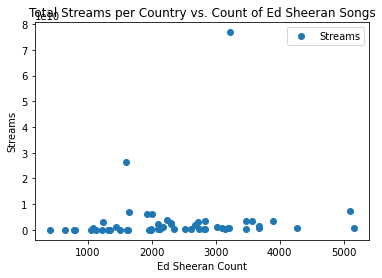

In [35]:
# plotting number of times Ed Sheeran songs are played in a country vs. Total number of streams of that country

X_var.plot(x = 'Ed Sheeran Count', y='Streams',style='o')
plt.title('Total Streams per Country vs. Count of Ed Sheeran Songs')  
plt.xlabel('Ed Sheeran Count')  
plt.ylabel('Streams')  
plt.show()

In [37]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = X_var['Ed Sheeran Count'].values.reshape(-1,1)
y = X_var['Streams'].values.reshape(-1,1)

In [38]:
X

array([[2295],
       [3894],
       [2353],
       [3187],
       [1221],
       [1641],
       [2719],
       [2299],
       [2109],
       [2823],
       [3470],
       [3674],
       [1632],
       [2102],
       [1319],
       [ 784],
       [1443],
       [1245],
       [2008],
       [3229],
       [1055],
       [1993],
       [1606],
       [2741],
       [1984],
       [1347],
       [3019],
       [5165],
       [2093],
       [2830],
       [ 796],
       [ 646],
       [ 406],
       [3103],
       [1929],
       [2840],
       [4265],
       [2673],
       [1505],
       [1963],
       [2169],
       [3480],
       [3203],
       [2523],
       [3684],
       [1134],
       [2232],
       [3569],
       [3151],
       [2612],
       [1076],
       [5102],
       [1592],
       [2131]], dtype=int64)

In [39]:
y

array([[ 2776971684],
       [ 3372128479],
       [  344322232],
       [  556799739],
       [   97248182],
       [ 6890194505],
       [ 3201208648],
       [ 2191334779],
       [  834076562],
       [  362874962],
       [  208602150],
       [ 1509648808],
       [  154057176],
       [  318441639],
       [   80421329],
       [   21653223],
       [ 1246077272],
       [ 3146285237],
       [ 6072757512],
       [76852243776],
       [   58780418],
       [  176974407],
       [   91375818],
       [  295800351],
       [  152772228],
       [   80100254],
       [ 1287300250],
       [  648164942],
       [ 2387015412],
       [  315926822],
       [   33654223],
       [   30363701],
       [    6018470],
       [  652284423],
       [ 6344670992],
       [ 3467630881],
       [  813211531],
       [ 2011024798],
       [  131475020],
       [  167178465],
       [ 1079068853],
       [ 3320833608],
       [  785350179],
       [  441238052],
       [  763807172],
       [  

In [40]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Testing Hypothesis

My hypothesis is "If a country has more Ed Sheeran in their top 200 songs, then they'll have more total streams."

In [41]:
# Create a regression object.

regression = LinearRegression()

In [42]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [43]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

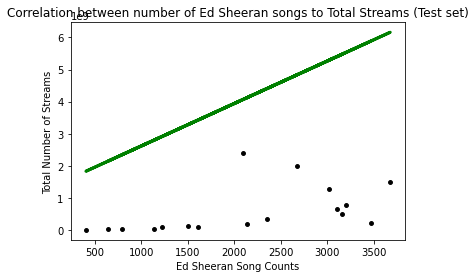

In [52]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='black', s = 15)
plot_test.plot(X_test, y_predicted, color='green', linewidth =3)
plot_test.title('Correlation between number of Ed Sheeran songs to Total Streams (Test set)')
plot_test.xlabel('Ed Sheeran Song Counts')
plot_test.ylabel('Total Number of Streams')
plot_test.show()

The line appears to fit horribly. It's greatly affected by the 'outliers.'

In [45]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [46]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1324530.19169575]]
Mean squared error:  1.367071649620199e+19
R2 score:  -24.950218176253728


In [47]:
y_predicted

array([[4.11706008e+09],
       [5.40450342e+09],
       [5.46808087e+09],
       [5.29324289e+09],
       [6.16081016e+09],
       [4.41110578e+09],
       [1.83224549e+09],
       [5.53695644e+09],
       [2.79650347e+09],
       [2.34881227e+09],
       [2.91173760e+09],
       [5.89060600e+09],
       [4.06672793e+09],
       [3.42168172e+09],
       [2.15013274e+09],
       [3.28790418e+09],
       [4.83495544e+09]])

In [48]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

Actual     Predicted
0    194949960  4.117060e+09
1    652284423  5.404503e+09
2    487115409  5.468081e+09
3   1287300250  5.293243e+09
4   1509648808  6.160810e+09
5    344322232  4.411106e+09
6      6018470  1.832245e+09
7    785350179  5.536956e+09
8     42731609  2.796503e+09
9     33654223  2.348812e+09
10    97248182  2.911738e+09
11   208602150  5.890606e+09
12  2387015412  4.066728e+09
13    91375818  3.421682e+09
14    30363701  2.150133e+09
15   131475020  3.287904e+09
16  2011024798  4.834955e+09

### Comparing against training set now

In [49]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [50]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [51]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1324530.19169575]]
Mean squared error:  1.63295815594143e+20
R2 score:  0.01164134352506141


The r-squared value is better than against the test set; however, it's still horrible meaning no connection.

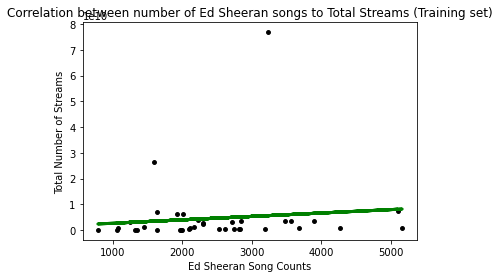

In [53]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='black', s = 15)
plot_test.plot(X_train, y_predicted_train, color='green', linewidth =3)
plot_test.title('Correlation between number of Ed Sheeran songs to Total Streams (Training set)')
plot_test.xlabel('Ed Sheeran Song Counts')
plot_test.ylabel('Total Number of Streams')
plot_test.show()

### Let's see what happens without outliers

In [54]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

df_outliers = X_var[X_var['Streams'] <=2000000000] 

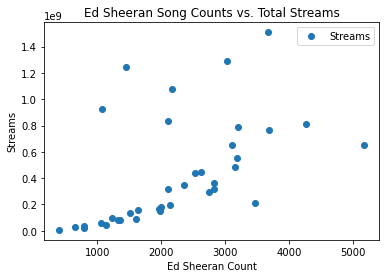

In [56]:
# See how the scatterplot looks without outliers.

df_outliers.plot(x = 'Ed Sheeran Count', y='Streams', style='o')  
plt.title('Ed Sheeran Song Counts vs. Total Streams')  
plt.xlabel('Ed Sheeran Count')  
plt.ylabel('Streams')  
plt.show()

In [58]:
# Reshape again.

X_2 = df_outliers['Ed Sheeran Count'].values.reshape(-1,1)
y_2 = df_outliers['Streams'].values.reshape(-1,1)

In [59]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [60]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [61]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [62]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [63]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[208342.26964719]]
Mean squared error:  1.3699882748209499e+17
R2 score:  0.19376111460949097


Much better on the r-squared and correlation!

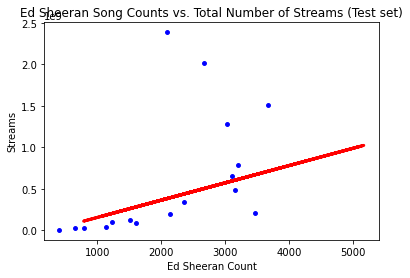

In [64]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test, y_test, color='blue', s = 15)
plot_test.plot(X_train, regression.predict(X_train), color='red', linewidth =3)
plot_test.title('Ed Sheeran Song Counts vs. Total Number of Streams (Test set)')
plot_test.xlabel('Ed Sheeran Count')
plot_test.ylabel('Streams')
plot_test.show()